In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('road_accident_dataset.csv')

In [5]:
data.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [6]:
data.columns

Index(['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
       'Road Type', 'Weather Conditions', 'Visibility Level',
       'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group',
       'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue',
       'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved',
       'Accident Severity', 'Number of Injuries', 'Number of Fatalities',
       'Emergency Response Time', 'Traffic Volume', 'Road Condition',
       'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
       'Region', 'Population Density'],
      dtype='object')

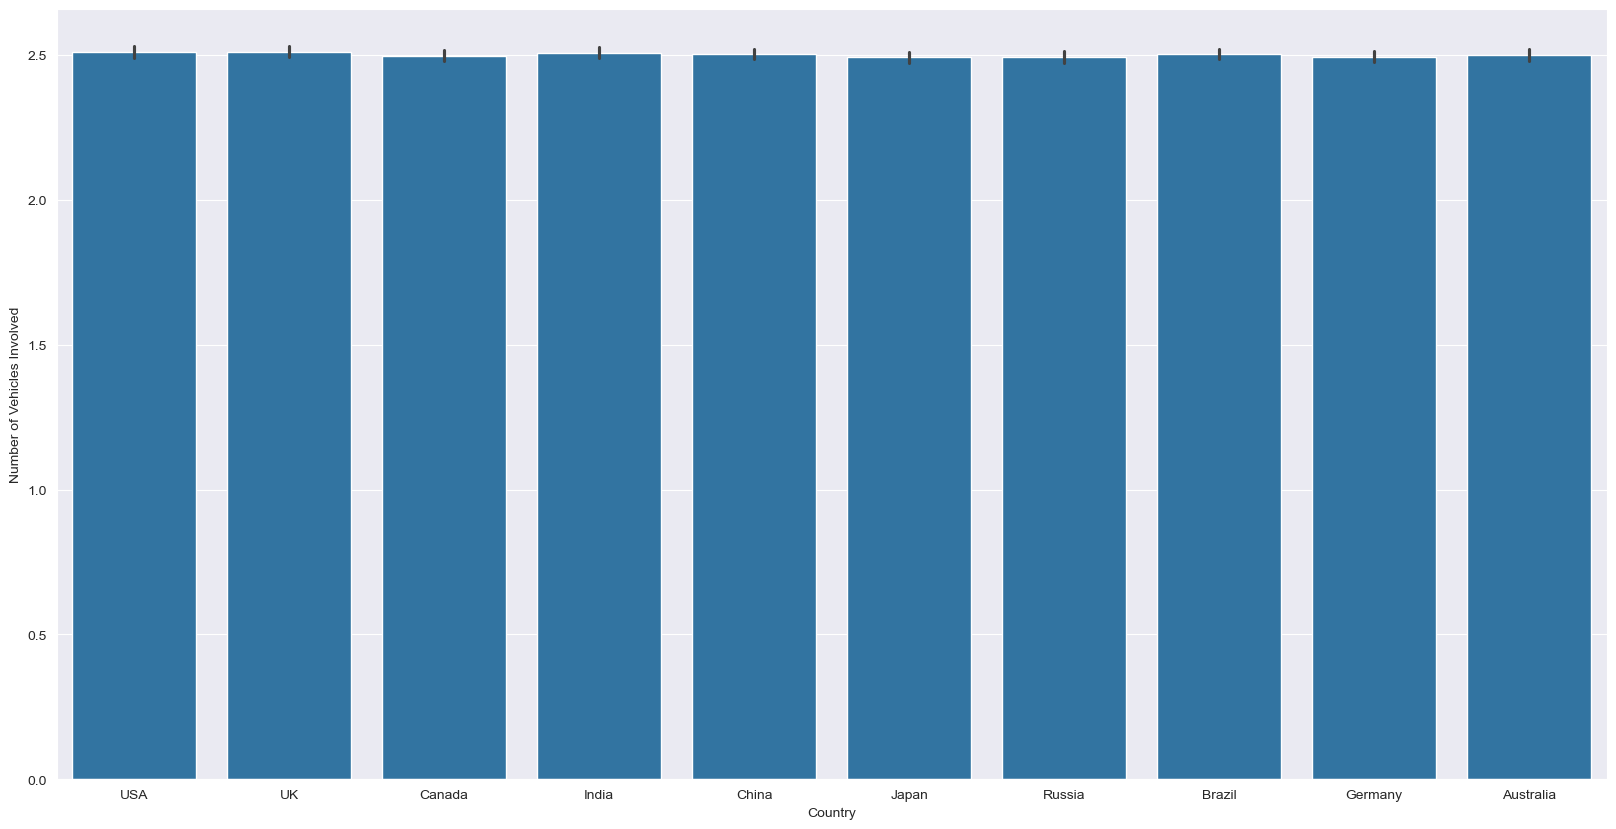

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(x=data['Country'],y=data['Number of Vehicles Involved'])
plt.xlabel('Country')
plt.ylabel('Number of Vehicles Involved')
plt.show()

Print the info of the data set that have been chosen

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.dropna(inplace=True)

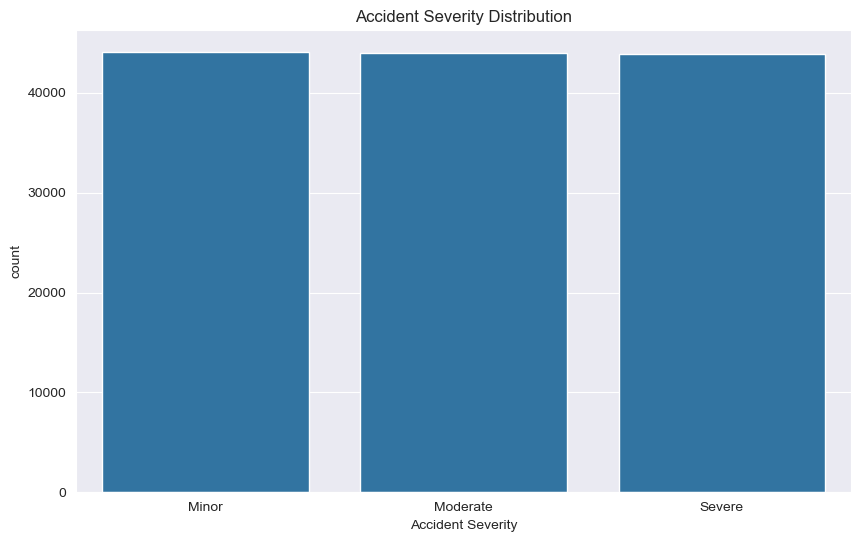

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Accident Severity'], order=data['Accident Severity'].value_counts().index)
plt.title("Accident Severity Distribution")
plt.show()

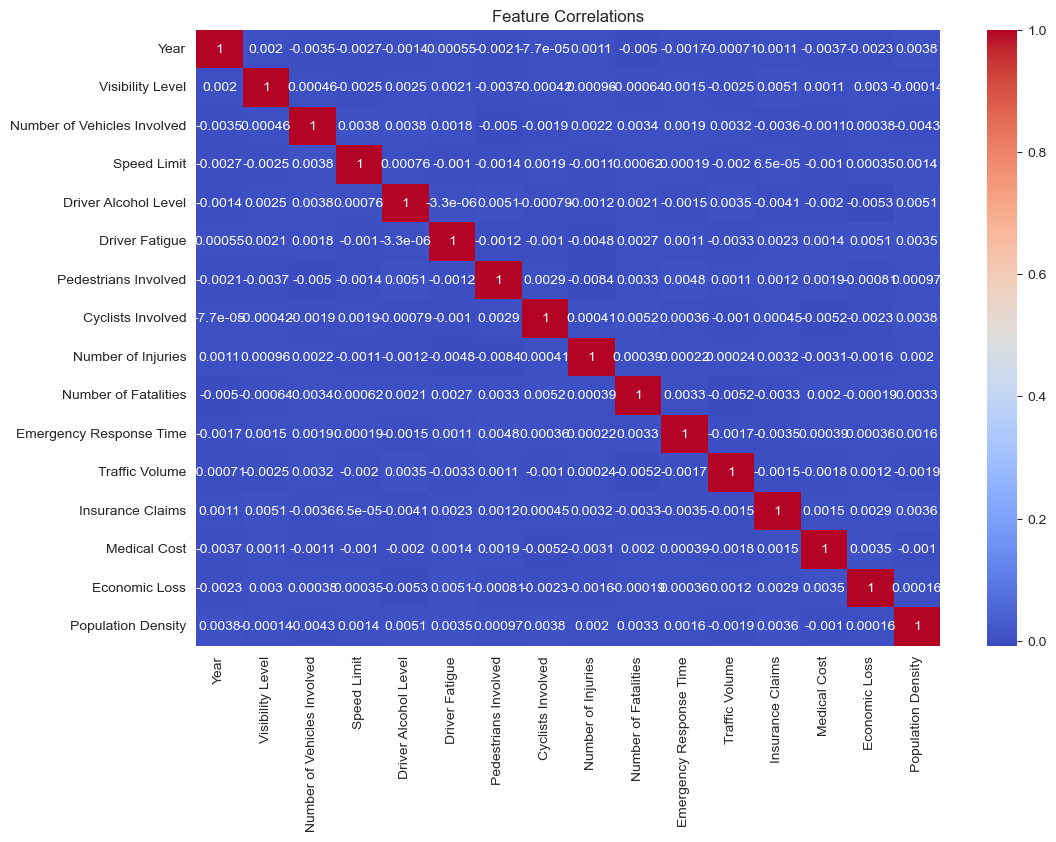

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

 # Regression: Predicting Economic Loss

In [20]:
features = ['Medical Cost', 'Number of Injuries', 'Number of Fatalities']
target = 'Economic Loss'
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error : " ,mse)

Mean squared error :  821730737.7125438


# Classification: Predicting Accident Severity

In [22]:
features = ['Speed Limit', 'Driver Alcohol Level', 'Driver Fatigue', 'Traffic Volume']
X = data[features]
y = data['Accident Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.33140151515151517


# Clustering: Identifying Accident Hotspots

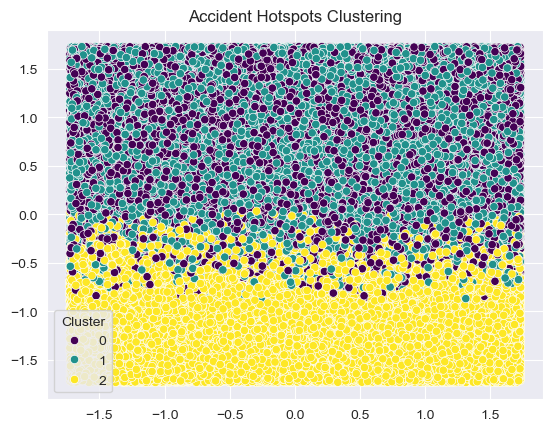

In [24]:
features = ['Traffic Volume', 'Population Density', 'Emergency Response Time']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Cluster'], palette='viridis')
plt.title("Accident Hotspots Clustering")
plt.show()